In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from operator import itemgetter

In [14]:
train = pd.read_csv('mnistTrain.csv', header = None)
test = pd.read_csv('mnistTest.csv', header = None)

In [15]:
print(train.shape)
print(test.shape)
train.head()

(1347, 65)
(450, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,1,10,16,15,5,0,0,0,...,0,0,0,0,10,15,5,0,0,8
1,0,0,0,2,14,0,0,0,0,0,...,0,0,0,0,0,16,6,0,0,4
2,0,1,13,16,16,8,0,0,0,11,...,0,0,1,12,16,16,11,1,0,3
3,0,0,2,12,8,7,6,2,0,0,...,0,0,0,4,16,2,0,0,0,7
4,0,0,3,10,16,4,0,0,0,1,...,0,0,0,4,14,13,5,0,0,0


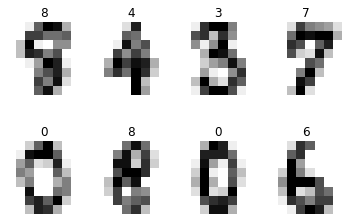

In [16]:
for index, row in train.head(8).iterrows():
    image = []
    for i in range(8):
        image.append(row[i*8:(i+1)*8])
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % row[64])

In [17]:
testTarget = test.iloc[:,-1]
testImage = test.iloc[:,0:-1]
trainTarget = train.iloc[:,-1]
trainImage = train.iloc[:,0:-1]

Training Testing split

In [18]:
def euclideanDistance(point1, point2):
    distance = 0
    for x in range(len(point1)):
        distance += pow((point1[x] - point2[x]), 2)
    return math.sqrt(distance)

euclideanDistane((0,0),(3,4))= sqrt((3-0)^2 + (4-0)^2) = 5

In [19]:
def knn(k, image):
    dists = []
    for index, row in trainImage.iterrows():
        dist = euclideanDistance(image, row)
        dists.append([dist,trainTarget[index]])
        dists=sorted(dists, key=itemgetter(0))[:k]
    return([x[1] for x in dists])

knn returns a list of the classfications of the k-nearest neighbors

In [21]:
print(knn(4, testImage.iloc[0,:]))

[1, 1, 1, 1]


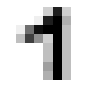

In [22]:
image = []
for i in range(8):
    image.append(testImage.iloc[0,i*8:(i+1)*8])
plt.subplot(2, 4, index + 1)
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
count = 0
for i in range(len(testTarget)):
    nn = knn(8, testImage.iloc[i,:])
    if max(set(nn), key=nn.count) == testTarget[i]:
        count+=1

In [23]:
print(count/len(testTarget))

0.9777777777777777
